In [78]:
import matplotlib.pyplot as plt # crear graficos
plt.rcParams["figure.figsize"] = (10,5) # cambiar el tamano de las figuras
import seaborn as sns # graficos con dataframes

import numpy as np # manipulacion de vectores
import pandas as pd # manipulacion de dataframes igual R

import statsmodels.api as sm # paquete estadístico parecido a R para modelos estadísticos
from scipy import stats # librerías estadística
%pip install pingouin
import pingouin as pg # test etadísticos
import math # funciones matematicas
from scipy.stats import pearsonr # importar la función pearson
import sklearn.metrics as metrics # métricas de error de modelos
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import plotly.express as px # crear gráficos interactivos

import plotly.figure_factory as ff # crear figuras especiales de plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


1-LEE LA TABLA DE DATOS STROKE

In [53]:
#leer csv con pandas
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1999 non-null   int64  
 1   gender             1999 non-null   object 
 2   age                1999 non-null   float64
 3   hypertension       1999 non-null   int64  
 4   heart_disease      1999 non-null   int64  
 5   ever_married       1999 non-null   object 
 6   work_type          1999 non-null   object 
 7   Residence_type     1999 non-null   object 
 8   avg_glucose_level  1999 non-null   float64
 9   bmi                1894 non-null   float64
 10  smoking_status     1999 non-null   object 
 11  stroke             1999 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 187.5+ KB


2- Compara las medias de la age con la variable stroke con el t-test y ANOVA

In [55]:
data['age'].mean()
data[data['stroke']==1].count()

id                   249
gender               249
age                  249
hypertension         249
heart_disease        249
ever_married         249
work_type            249
Residence_type       249
avg_glucose_level    249
bmi                  209
smoking_status       249
stroke               249
dtype: int64

Vamos a comparar si la edad influye en la variable stroke.

Podemos definir las siguientes hipótesis:

- H0: la edad no influye en contraer un ictus (stroke)
- H1: la edad influye en contraer un ictus (stroke)

Vamos a "contestar" estas hipótesis utilizando el t-test:

In [33]:
# Calcular la variable respuesta binaria: ictus si o no: (No hace falta para el ejercicio porque ya esta en binario)
data['ictus_si'] = np.where(data.stroke == 1, 1, 0)

In [57]:
# T-test dos medias
# Test para grupos independientes (p-value, intervalos de confianza)
# ==============================================================================
ictus_positivo = data.loc[data['stroke'] == 1, 'age']
ictus_negativo = data.loc[data['stroke'] == 0, 'age']

pg.ttest(x=ictus_positivo, y=ictus_negativo, alternative='two-sided', correction=False)


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,18.080834,5108,two-sided,7.030778e-71,"[22.96, 28.55]",1.174807,1.304e+67,1.0


In [58]:
#los resultados muestran que la edad si que influye
#para observar cual es la media de edad y la desviación miramos las medias para stroke 0 o 1 por grupos
df = data.copy()

stats = df.groupby(['stroke'])['age'].agg(['mean', 'count', 'std'])
print(stats)

             mean  count        std
stroke                             
0       41.971545   4861  22.291940
1       67.728193    249  12.727419


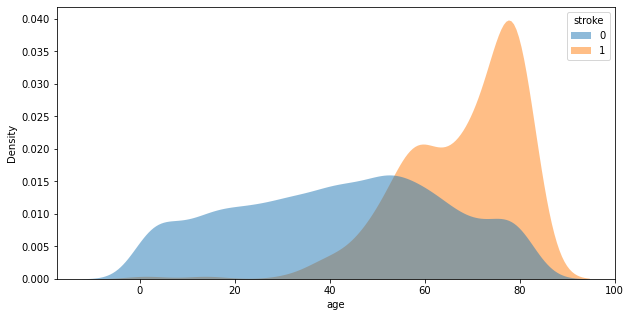

In [59]:
# Histograma de densidad de un factor
x = "age" # selecciona la variable numérica
y = "stroke" # selecciona la variable cualitativa o factor

sns.kdeplot(
    data=data, x=x, hue=y,
    fill=True, common_norm=False,
    alpha=.5, linewidth=0)
plt.show()

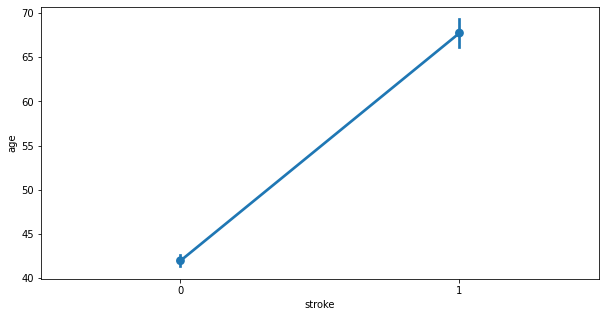

In [60]:
# Diagramas de error o de medias de un factor. Muestra la media y el intervalo de confianza de la media

x = "age" # selecciona la variable numérica
y = "stroke" # selecciona la variable cualitativa o factor

sns.pointplot(x=y, y=x, data=data)
plt.show()

   3- Compara el avg_glucose_level en función de smoking_status
   Vamos a comparar si el fumar influye en el nivel medio de glucosa.

Podemos definir las siguientes hipótesis:

- H0: fumar no influye en el nivel de glucosa
- H1: fumar si que influye en el nivel de glucosa

Vamos a "contestar" estas hipótesis utilizando el t-test:

In [62]:
data['smoking_status']

0       formerly smoked
1          never smoked
2          never smoked
3                smokes
4          never smoked
             ...       
5105       never smoked
5106       never smoked
5107       never smoked
5108    formerly smoked
5109            Unknown
Name: smoking_status, Length: 5110, dtype: object

In [63]:
# Número de observaciones por grupo
# ==============================================================================
data.groupby('smoking_status').size()

smoking_status
Unknown            1544
formerly smoked     885
never smoked       1892
smokes              789
dtype: int64

In [64]:
# Média y desviación típica por grupo
# ==============================================================================
data.groupby('smoking_status').agg(['mean', 'std'])

C:\Users\108893\AppData\Local\Temp\ipykernel_3136\12018485.py:3: FutureWarning: ['gender', 'ever_married', 'work_type', 'Residence_type'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  data.groupby('smoking_status').agg(['mean', 'std'])


id                      age             \
                         mean           std       mean        std   
smoking_status                                                      
Unknown          35899.042098  20973.579501  30.229922  25.055556   
formerly smoked  36878.981921  21618.451094  54.929944  17.641723   
never smoked     36833.141649  21025.816507  46.744715  19.769584   
smokes           36567.533587  21348.252902  47.096324  16.413002   

                hypertension           heart_disease            \
                        mean       std          mean       std   
smoking_status                                                   
Unknown             0.033679  0.180459      0.031088  0.173612   
formerly smoked     0.135593  0.342550      0.087006  0.282003   
never smoked        0.122622  0.328089      0.047569  0.212908   
smokes              0.119138  0.324156      0.077313  0.267257   

                avg_glucose_level                   bmi              stroke  \
                             mean        std       mean       std      mean   
smoking_status                                                                
Unknown                 99.601541  36.606195  25.666352  8.144856  0.030440   
formerly smoked        112.886079  52.256627  30.747192  6.981149  0.079096   
never smoked           107.558092  46.679640  29.982559  7.463217  0.047569   
smokes                 108.017440  47.280803  30.543555  7.192536  0.053232   

                           
                      std  
smoking_status             
Unknown          0.171851  
formerly smoked  0.270041  
never smoked     0.212908  
smokes           0.224638

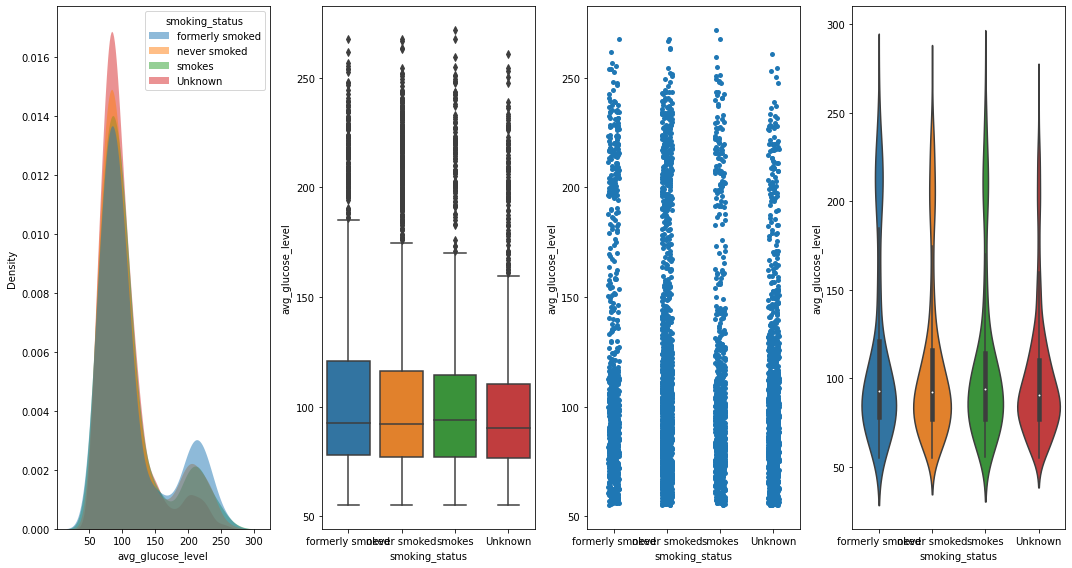

In [66]:
# Varios plots a la vez de un factor:

x = "avg_glucose_level" # selecciona la variable numérica
y = "smoking_status" # selecciona la variable cualitativa o factor

fig, axs = plt.subplots(ncols=4, figsize=(15, 8))
sns.kdeplot(
    data=data, x=x, hue=y,
    fill=True, common_norm=False,
    alpha=.5, linewidth=0, ax=axs[0])
sns.boxplot(data=data, y=x, x=y,ax=axs[1])
sns.stripplot(y= x,data=data, x =y,ax=axs[2])
sns.violinplot(data=data, y=x, x=y,ax=axs[3])
fig.tight_layout()
plt.show()

Según la descriptiva podemos intuir que no parece existir una relacion directa entre los fumadores y el nivel de glucosa.

La descriptiva nos da pistas de lo que pasa :)

In [67]:
# ANOVA
# Test ANOVA de una vía (One-way ANOVA)
# ==============================================================================
pg.anova(data=data, dv='avg_glucose_level', between='smoking_status', detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,smoking_status,1.128697e+05,3,37623.246154,18.536355,5.885157e-12,0.010774
1,Within,1.036365e+07,5106,2029.700323,NaN,NaN,NaN


El p-valor aquí es p-unc = 5.885157e-12 --> 0

Podemos rechazar la hipótesis nula y quedarnos con la hipótesis alternativa.

Es decir, hay diferencias en algún grupo.

Pero... entre qué grupos hay diferencias. Para contestar ello podemos utilizar la comparación por parejas:

In [68]:
# Pairwise comparison
# Post-hoc Tukey test
# ==============================================================================
pg.pairwise_tukey(data=data, dv='avg_glucose_level', between='smoking_status').round(3)

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Unknown,formerly smoked,99.602,112.886,-13.285,1.899,-6.994,0.000,-0.309
1,Unknown,never smoked,99.602,107.558,-7.957,1.545,-5.150,0.000,-0.187
2,Unknown,smokes,99.602,108.017,-8.416,1.972,-4.269,0.000,-0.208
3,formerly smoked,never smoked,112.886,107.558,5.328,1.835,2.904,0.019,0.110
4,formerly smoked,smokes,112.886,108.017,4.869,2.206,2.207,0.121,0.097
5,never smoked,smokes,107.558,108.017,-0.459,1.909,-0.241,0.995,-0.010


 4- Relaciona la av_glucose_level con la age

or ejemplo: queremos relacionar el nivel de glucosa con la edad, entonces las hipótesis se puede definir como:

- H0: el nivel de glusocosa y la edad no están relacionados o asociados
- H1: el nivel de glucosa y la edad están asociados o relacionados

¡Vamos a ver cómo se contesta en la práctica!

Podemos utilizar principalmente tres coeficientes de correlación.

El coeficiente de Pearson, coeficiente de Spearman o el coeficiente de Kendall.
- El de Pearson se utiliza cuando las variables son normales
- El de Spearman cuando alguna no lo es.
- El de Kendall cuando las dos variables son ordinales


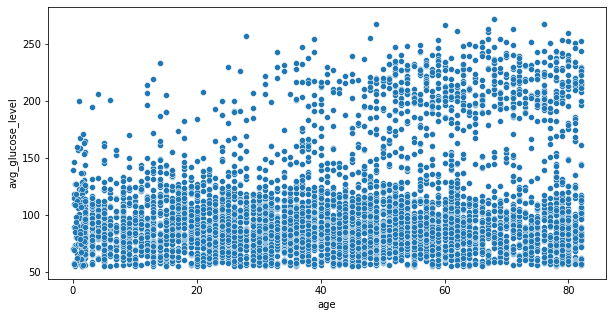

In [70]:
# Diagramas de dispersión 2D

x = 'age'
y = 'avg_glucose_level'


# seaborn
sns.scatterplot(data=data, x=x, y=y)
plt.show()

In [71]:
# plotly
fig = px.scatter(data,x=x,y=y)
fig.show()

In [72]:
# Cálculo de correlación con Pandas
# ==============================================================================
print('Correlación Pearson: ', data['age'].corr(data['avg_glucose_level'], method='pearson'))
print('Correlación spearman: ', data['age'].corr(data['avg_glucose_level'], method='spearman'))
print('Correlación kendall: ', data['age'].corr(data['avg_glucose_level'], method='kendall'))

Correlación Pearson:  0.23817111410174327
Correlación spearman:  0.1451677092953779
Correlación kendall:  0.09785755450202284


In [79]:
# Cálculo de correlación y significancia con Scipy
# ==============================================================================
r, p = stats.pearsonr(data['avg_glucose_level'], data['age'])
print(f"Correlación Pearson: r={r}, p-value={p}")

r, p = stats.spearmanr(data['avg_glucose_level'], data['age'])
print(f"Correlación Spearman: r={r}, p-value={p}")

r, p = stats.kendalltau(data['avg_glucose_level'], data['age'])
print(f"Correlación Pearson: r={r}, p-value={p}")

Correlación Pearson: r=0.2381711141017434, p-value=7.856310807798251e-67
Correlación Spearman: r=0.1451677092953779, p-value=1.8096446852948585e-25
Correlación Pearson: r=0.09785755450202284, p-value=1.9158073571376387e-25


5- Compara las proporciones de hypertension con stroke

Ahora es el turno de comparar y asociar proporciones en un mismo test.

El test de chi cudrado nos permite comparar las proporciones entre dos variables cualtitativas.

Por ejemplo, vamos a comparar el tener o no un ictus con la hypertension. 

Ambas variables son cualitativas y queremos comparar las proporciones.

Es decir, queremos ver si la distribución de proporciones del grupo de ventas altas es igual o diferente a la distribución de proporciones de ventas bajas.

Empezamos a describir y lo verás más claro:

In [80]:
# Número de observaciones por grupo
# ==============================================================================
data.groupby('hypertension').size()

hypertension
0    4612
1     498
dtype: int64

In [81]:
data.groupby('stroke').size()

stroke
0    4861
1     249
dtype: int64

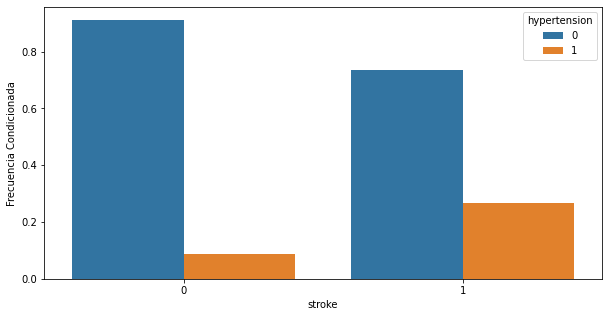

,stroke,hypertension,Frecuencia Condicionada
0,0,0,0.911129
1,0,1,0.088871
2,1,0,0.734940
3,1,1,0.265060


In [83]:
# Diagramas de barras de dos factores de frecuencias condicionadas a los grupos de la variable x

x = 'stroke'
y = 'hypertension'


pct2 = (data.groupby([x,y]).size() / data.groupby([x]).size()).reset_index().rename({0:'Frecuencia Condicionada'}, axis=1)
# seaborn
sns.barplot(x=x, hue=y, y='Frecuencia Condicionada', data=pct2)
plt.show()

pct2

Para el grupo stroke = 0 tenemos un reparto de proporciones:
    
    91.1% 0
    8.88% 1
    
Y paa el grupo de stroke = 1 tenemos un reparto de proporciones:

    73.49% 0
    26.5%  1
   
    
Fíjate que el reparto es diferente en proporciones.
Queremos contestar esto con el test de Chi Cuadrado y ver si:

- H0: hay igualdad entre las proporciones de un grupo y el otro
- H1: hay diferencias entre las proporciones de un grupo y otro

El test de Chi Cuadrado también mide la asociación entre las dos variables asi que también existen las hipótesis:

- H0: stoke no está relacionada con hipertension
- H1: stroke está relacionada con hipertension

Mire comparación y relación en un mismo test.

Vamos a aplicarlo:

In [85]:
# Chi Cuadrado
valores_esperados, valores_observados, stats = pg.chi2_independence(data,x='stroke',y='hypertension')

valores_esperados

hypertension,0,1
stroke,,
0,4387.266536,473.733464
1,224.733464,24.266536


In [86]:
valores_observados

hypertension,0,1
stroke,,
0,4428.5,432.5
1,183.5,65.5


In [87]:
valores_esperados-valores_observados

hypertension,0,1
stroke,,
0,-41.233464,41.233464
1,41.233464,-41.233464


In [88]:
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,81.605368,1.0,1.661622e-19,0.126371,1.000000
1,cressie-read,0.666667,72.922988,1.0,1.348088e-17,0.119460,1.000000
2,log-likelihood,0.000000,59.769802,1.0,1.066269e-14,0.108151,1.000000
3,freeman-tukey,-0.500000,52.612863,1.0,4.062199e-13,0.101469,1.000000
4,mod-log-likelihood,-1.000000,47.113056,1.0,6.700785e-12,0.096020,1.000000
5,neyman,-2.000000,39.537634,1.0,3.217978e-10,0.087962,0.999992


  6- Calcula un modelo regresión con la variable avg_glucose_level como salida y poniendo la variable age como entrada

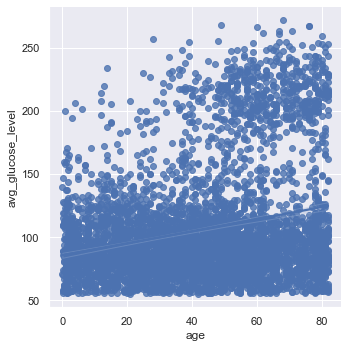

In [90]:
# Scatterplot 2d con linea de tendencia por grupos

x = "age" # variable numérica eje horizontal
y = "avg_glucose_level" # variable numérica eje vertical

sns.set_theme()

# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=data,
    x=x, y=y,
    height=5
)
plt.show()

In [91]:
# Definimos primero la matriz de entrada y la variable de salida:

y = data['age']
X = data['avg_glucose_level']

In [92]:
# Regresión lineal Simple
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_ = sm.add_constant(X, prepend=True)
modelo = sm.OLS(endog=y, exog=X_)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     307.2
Date:                Tue, 03 Jan 2023   Prob (F-statistic):           7.86e-67
Time:                        13:25:29   Log-Likelihood:                -23037.
No. Observations:                5110   AIC:                         4.608e+04
Df Residuals:                    5108   BIC:                         4.609e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                30.6022      0.78

In [93]:
valores_estimados = modelo.predict()

In [94]:
resultados_modelo = pd.DataFrame(valores_estimados)
resultados_modelo.columns = ['Valores Estimados']
resultados_modelo['Valores Reales'] = y
resultados_modelo['Residuo'] = resultados_modelo['Valores Reales']-resultados_modelo['Valores Estimados']
resultados_modelo.head()

,Valores Estimados,Valores Reales,Residuo
0,57.800858,67.0,9.199142
1,54.651530,61.0,6.348470
2,43.199536,80.0,36.800464
3,50.967007,49.0,-1.967007
4,51.310721,79.0,27.689279


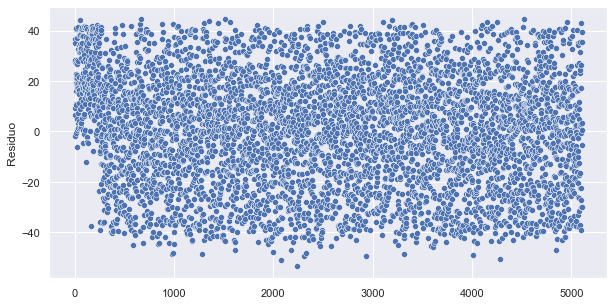

In [95]:
sns.scatterplot(data=resultados_modelo, x = np.arange(len(resultados_modelo)),y="Residuo")
plt.show()

C:\Users\108893\AppData\Local\Temp\ipykernel_3136\1894966050.py:5: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



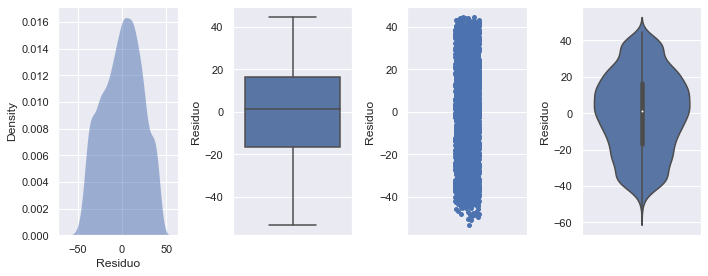

In [96]:
# Descrpcion de una variable cuantitativa: "residuos"
df = resultados_modelo
fig, axs = plt.subplots(ncols=4, figsize=(10, 4))
# Histograma de densidad
sns.kdeplot(
    data=df, x='Residuo',
    fill=True, common_norm=False, palette="crest",
    alpha=.5, linewidth=0, ax=axs[0])
# Boxplot
sns.boxplot(data=df, y='Residuo',ax=axs[1])
# Stripchart
sns.stripplot(y= 'Residuo',data=df,ax=axs[2])
# Violinplot
sns.violinplot(data=df, y='Residuo',ax=axs[3])
fig.tight_layout()
plt.show()

In [97]:
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     307.2
Date:                Tue, 03 Jan 2023   Prob (F-statistic):           7.86e-67
Time:                        13:28:53   Log-Likelihood:                -23037.
No. Observations:                5110   AIC:                         4.608e+04
Df Residuals:                    5108   BIC:                         4.609e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                30.6022      0.78

7- Calcula un modelo de clasificación logístico con la variable de salida stroke en función de aquellas que consideres de entrada que puedan afectar

In [98]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [101]:
# Seleccionamos las variables numéricas y la respuests:
var_num = ['stroke','age','hypertension','heart_disease','avg_glucose_level', 'bmi']
X_num_tot = data[var_num]

In [102]:
# Correlacion en valor absoluta de la variable de salida
cor = X_num_tot.corr(method = 'spearman')
cor_target = pd.DataFrame(abs(cor['stroke']))
cor_target = cor_target.sort_values(by = 'stroke',ascending = 0)
cor_target

,stroke
stroke,1.000000
age,0.249531
heart_disease,0.134914
hypertension,0.127904
avg_glucose_level,0.082541
bmi,0.055445


In [103]:
cor_target.index

Index(['stroke', 'age', 'heart_disease', 'hypertension', 'avg_glucose_level',
       'bmi'],
      dtype='object')

In [104]:
# Definimos primero la matriz de entrada y la variable de salida:

y = data['stroke']
X = data[['age', 'heart_disease', 'hypertension']]

In [105]:
# Regresión lineal múltiple
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_ = sm.add_constant(X, prepend=True)
modelo = sm.OLS(endog=y, exog=X_)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                 stroke   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     126.2
Date:                Tue, 03 Jan 2023   Prob (F-statistic):           7.44e-79
Time:                        13:37:39   Log-Likelihood:                 779.55
No. Observations:                5110   AIC:                            -1551.
Df Residuals:                    5106   BIC:                            -1525.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0454      0.006     -7.145

In [106]:
valores_estimados = modelo.predict()
resultados_modelo = pd.DataFrame(valores_estimados)
resultados_modelo.columns = ['Valores Estimados']
resultados_modelo['Valores Reales'] = y
resultados_modelo['Residuo'] = resultados_modelo['Valores Reales']-resultados_modelo['Valores Estimados']
resultados_modelo.head()

,Valores Estimados,Valores Reales,Residuo
0,0.157443,1,0.842557
1,0.075891,1,0.924109
2,0.183284,1,0.816716
3,0.052037,1,0.947963
4,0.156888,1,0.843112


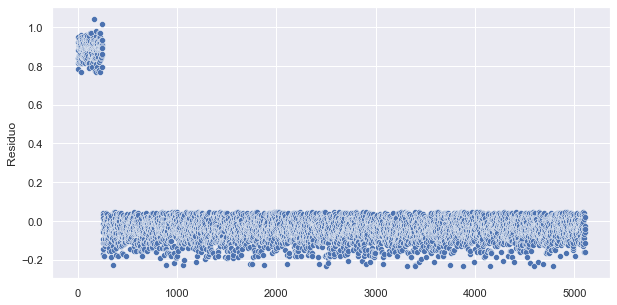

In [107]:
sns.scatterplot(data=resultados_modelo, x = np.arange(len(resultados_modelo)),y="Residuo")
plt.show()

C:\Users\108893\AppData\Local\Temp\ipykernel_3136\1894966050.py:5: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



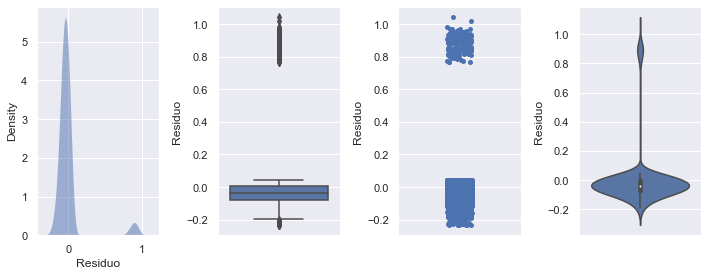

In [108]:
# Descrpcion de una variable cuantitativa: "residuos"
df = resultados_modelo
fig, axs = plt.subplots(ncols=4, figsize=(10, 4))
# Histograma de densidad
sns.kdeplot(
    data=df, x='Residuo',
    fill=True, common_norm=False, palette="crest",
    alpha=.5, linewidth=0, ax=axs[0])
# Boxplot
sns.boxplot(data=df, y='Residuo',ax=axs[1])
# Stripchart
sns.stripplot(y= 'Residuo',data=df,ax=axs[2])
# Violinplot
sns.violinplot(data=df, y='Residuo',ax=axs[3])
fig.tight_layout()
plt.show()

In [109]:
# Regresión logística simple
y = data['stroke']
X = data['hypertension']

# Creación del modelo
# ==============================================================================
# Para no incluir ningún tipo de regularización en el modelo se indica
# penalty='none'
X_ = sm.add_constant(X, prepend=True)
modelo = sm.Logit(endog=y, exog=X_)
modelo = modelo.fit()
modelo.summary()

Optimization terminated successfully.
         Current function value: 0.188777
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 stroke   No. Observations:                 5110
Model:                          Logit   Df Residuals:                     5108
Method:                           MLE   Df Model:                            1
Date:                Tue, 03 Jan 2023   Pseudo R-squ.:                 0.03068
Time:                        13:40:27   Log-Likelihood:                -964.65
converged:                       True   LL-Null:                       -995.19
Covariance Type:            nonrobust   LLR p-value:                 5.503e-15
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -3.1864      0.075    -42.242      0.000      -3.334      -3.039
hypertension     1.3077      0.152      8.593      0.000       1.009       1.606
================================================================================
"""

In [110]:
prob_modelo = modelo.predict()

In [111]:
prob_modelo[:5] # las primeras 5 probabilidades

array([0.0396791 , 0.0396791 , 0.0396791 , 0.0396791 , 0.13253012])

In [112]:
(prob_modelo>0.5)[:5]

array([False, False, False, False, False])

In [113]:
# Clasificación predicha
# ==============================================================================
clasificacion = np.where(prob_modelo<0.5, 0, 1)
clasificacion[:5]

array([0, 0, 0, 0, 0])

In [114]:
resultados_modelo = pd.DataFrame(prob_modelo)
resultados_modelo.columns = ["Probabilidad Predicha"]
resultados_modelo["Clasificacion Predicha"] = clasificacion
resultados_modelo["Claificacion Real"] = y
resultados_modelo.head(20)

,Probabilidad Predicha,Clasificacion Predicha,Claificacion Real
0,0.039679,0,1
1,0.039679,0,1
2,0.039679,0,1
3,0.039679,0,1
4,0.132530,0,1
5,0.039679,0,1
6,0.132530,0,1
7,0.039679,0,1
8,0.039679,0,1
9,0.039679,0,1


In [115]:
print('Predicción de Validación:')
y_modelo = resultados_modelo["Clasificacion Predicha"]
y_real = y
print(accuracy_score(y_real, y_modelo))
print(confusion_matrix(y_real, y_modelo))
print(classification_report(y_real, y_modelo))

Predicción de Validación:
0.9512720156555773
[[4861    0]
 [ 249    0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      4861
           1       0.00      0.00      0.00       249

    accuracy                           0.95      5110
   macro avg       0.48      0.50      0.49      5110
weighted avg       0.90      0.95      0.93      5110



c:\Users\108893\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\108893\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\108893\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

